In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures

In [2]:

x= np.random.rand(200,1) * 10


In [3]:
w0=np.random.rand(1) * 10
w1=np.random.rand(1) * 10
w2=np.random.rand(1) * 10
w3=np.random.rand(1) * 10
w4=np.random.rand(1) * 10

In [4]:
y=w0+w1*x+w2*(x**2)+w3*(x**3)+w4*(x**4)
y = y + np.random.normal(scale=3, size=y.shape)

In [5]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [6]:
poli = PolynomialFeatures(degree=16)
x = poli.fit_transform(x)
split = int(x.shape[0] * 0.8)
y_train = y[:split]
y_test = y[split:]

In [7]:
MSE_train = []
MSE_test = []
x_line = np.arange(0,10,1).reshape(-1,1)
lr_model = LinearRegression(normalize=True)

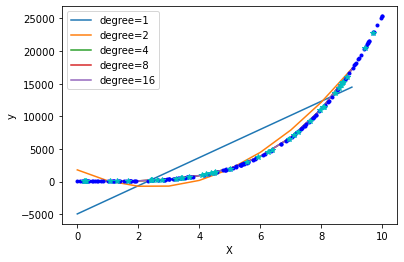

In [8]:
for i in [1,2,4,8,16]:
    
    X_train = x[:split,1:i+1]
    X_test = x[split:,1:i+1]
    
    lr_model.fit(X_train, y_train)
    h_train = lr_model.predict(X_train)
    h_test = lr_model.predict(X_test)
    MSE_train.append(np.mean((y_train - h_train) ** 2) / 2)
    MSE_test.append(np.mean((y_test - h_test) ** 2) / 2)
    x_line2 = poli.fit_transform(x_line)
    y_line = lr_model.predict(x_line2[:,1:i+1])
    plt.plot(x_line, y_line)
Legend = ['degree=1','degree=2','degree=4','degree=8','degree=16']
plt.legend(Legend)
plt.plot(x[0:split,1],y_train,'b.')
plt.plot(x[split:,1],y_test,'c*')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Text(0, 0.5, 'MSE Score')

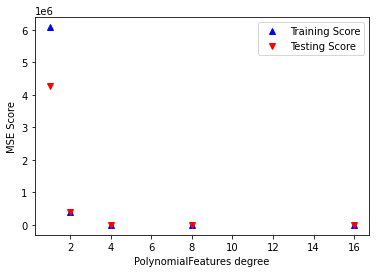

In [9]:
plt.plot([1,2,4,8,16],MSE_train,'b^')
plt.plot([1,2,4,8,16],MSE_test,'rv')
plt.legend(["Training Score", "Testing Score"])
plt.xlabel('PolynomialFeatures degree')
plt.ylabel('MSE Score')

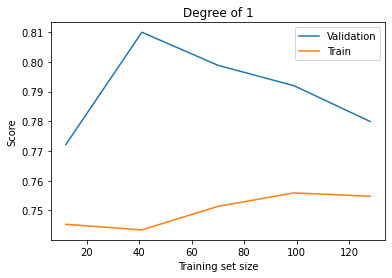

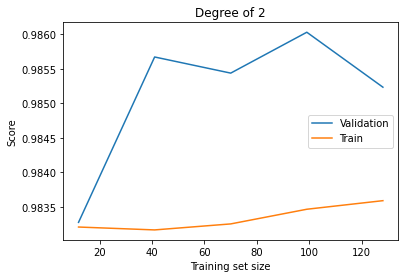

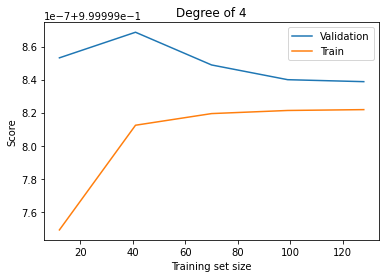

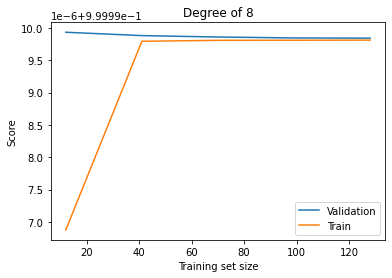

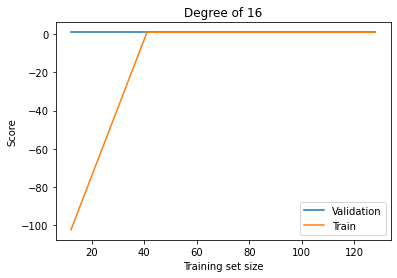

In [10]:
from sklearn.model_selection import  learning_curve
for i,i in enumerate([1,2,4,8,16]):
    train_sizes, test_score, train_score = learning_curve(lr_model, x[0:split,1:i+1], y_train, cv=5)
    plt.figure(i)
    plt.plot(train_sizes, test_score.mean(axis=1), label = 'Validation')
    plt.plot(train_sizes, train_score.mean(axis=1), label = 'Train')
    plt.title('Degree of '+str(i))
    plt.legend()
    plt.xlabel('Training set size')
    plt.ylabel('Score')